In [1]:
from ema_workbench import (RealParameter, IntegerParameter, ScalarOutcome, Constant,
                           Model, ema_logging, perform_experiments)

#from dps_lake_model import lake_model

import os
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
subprocess.getoutput('ls')

'Dockerfile\nIPC.ipynb\nREADME.md\ngene_data\njdk-11.0.9_linux-x64_bin.tar.gz\noutputs\nsenstivity.ipynb\ntools'

In [3]:
def func_precision(stringList, answer):
    goal_count = 0
    found = 0
    for result in stringList:
        if result == str(answer):
            found = 1
        goal_count += 1
    return found/(goal_count-1)

def func_recall(stringList, answer):
    found = 0
    for result in stringList:
        if result == str(answer):
            found = 1
            break
    return found

def func_accuracy(total, stringList, answer):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for result in stringList[0:-1]:
        if result == str(answer):
            tp += 1
        else:
            fp += 1
    
    fn = 1 - tp
    
    # total is the number of all goals
    tn = total - tp - fp - fn
    return (tp + tn)/(tn + tp + fp + fn)


def calculate_statistics():
    data = pd.read_csv("./outputs/blocks-world.csv")
    length = data.shape[0]
    num = 0
    
    precision = 0
    recall = 0
    accuracy = 0
    
    for index in range(length):

        answer = data.loc[index, "Real_Goal"]
        results = data.loc[index, "Results"].split("/")
        all_candidates = data.loc[index, "Cost"].split("/")
        
        total = len(all_candidates)-1   # the last one is /
        
        p = func_precision(results, answer)
        r = func_recall(results, answer)
        a = func_accuracy(total, results, answer)
        
        num += 1
        
        precision += p
        recall += r
        accuracy += a
        
    num += 1
    precision = precision/num
    recall = recall/num
    accuracy = accuracy/num 
    
    return precision, recall, accuracy
        
    
    

def gr_system(phi, lamb, delta):
    # run GR with phi lamb delta
    os.chdir("./tools/")
    os.system("java -jar gr_ipc.jar ../gene_data/ blocks-world %s %s %s" %(str(phi), str(lamb), str(delta)))
    os.chdir("../")
    # calculate p r a
    
    # print("passed")
    precision, recall, accuracy = calculate_statistics()
    
    return precision, recall, accuracy
    

In [4]:
ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)
    
model = Model('grsystem', function=gr_system)

# set levers
model.uncertainties = [IntegerParameter("phi", 0,100),
                RealParameter("delta", 0, 2),
                RealParameter("lamb", 1, 2)]

#specify outcomes
model.outcomes = [ScalarOutcome('precision'),
                  ScalarOutcome('recall'),
                  ScalarOutcome('accuracy')]

results = perform_experiments(model, 100)

[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing experiments sequentially
[EMA.ema_workbench.em_framework.experiment_runner/ERROR/MainProcess] 'float' object has no attribute 'split'
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/ema_workbench/em_framework/experiment_runner.py", line 85, in run_experiment
    model.run_model(scenario, policy)
  File "/usr/local/lib/python3.8/dist-packages/ema_workbench/util/ema_logging.py", line 158, in wrapper
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/ema_workbench/em_framework/model.py", line 338, in run_model
    outputs = self.run_experiment(experiment)
  File "/usr/local/lib/python3.8/dist-packages/ema_workbench/util/ema_logging.py", line 158, in wrapper
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-pac

EMAError: exception in run_model
Caused by: AttributeError: 'float' object has no attribute 'split'

[MainProcess/INFO] policy dropped from analysis because only a single category
[EMA.ema_workbench.analysis.feature_scoring/INFO/MainProcess] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[EMA.ema_workbench.analysis.feature_scoring/INFO/MainProcess] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[EMA.ema_workbench.analysis.feature_scoring/INFO/MainProcess] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[EMA.ema_workbench.analysis.feature_scoring/INFO/MainProcess] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[EMA.ema_workbench.analysis.feature_scoring/INFO/MainProcess] policy dropped from analysis because only a single category

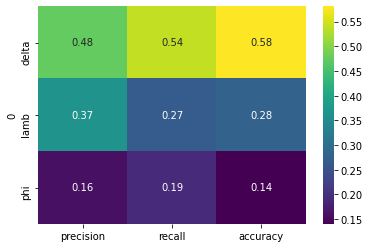

In [17]:
from ema_workbench.analysis import feature_scoring
experiments, outcomes = results
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [49]:
outcomes

{'precision': array([0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.256828, 0.256828, 0.256828, 0.256828,
        0.256828, 0.256828, 0.25682